In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("transformed_data.csv")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
DD         248 non-null int64
HH         248 non-null int64
Day        248 non-null int64
Rentals    248 non-null int64
dtypes: int64(4)
memory usage: 7.8 KB


Text(0, 0.5, 'Rentals')

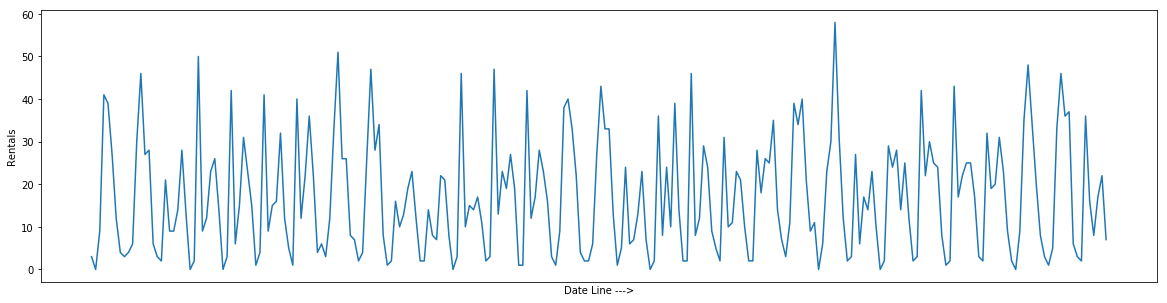

In [12]:
plt.figure(figsize=(20,5))
plt.plot(dataset['Rentals'].values)
plt.xticks(())
plt.xlabel("Date Line --->")
plt.ylabel("Rentals")

In [ ]:
plt.re

Text(0, 0.5, 'Rentals')

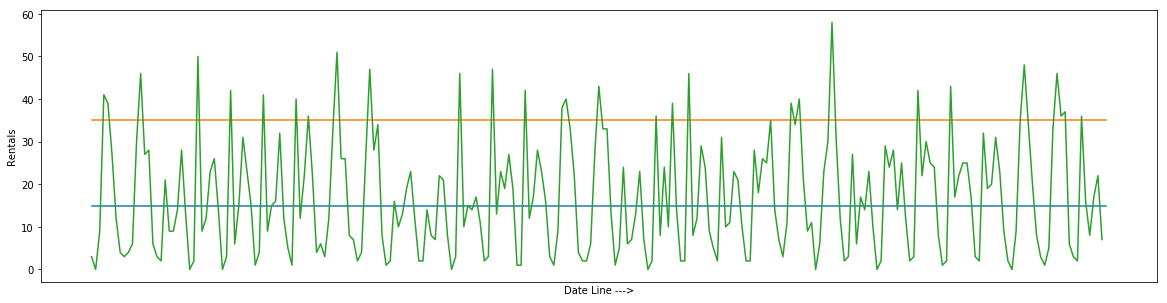

In [20]:
plt.figure(figsize=(20,5))
plt.plot([0,248],[15,15])
plt.plot([0,248],[35,35])
plt.plot(dataset['Rentals'].values)
plt.xticks(())
plt.xlabel("Date Line --->")
plt.ylabel("Rentals")

In [21]:
class_names = ["Low","Moderate","High"]

In [29]:
target = []
for i in dataset.iloc[:,-1].values:
    if i < 15 :
        target.append(0)
    elif i >=15 and i <35 :
        target.append(1)
    else :
        target.append(2)
target = np.array(target)

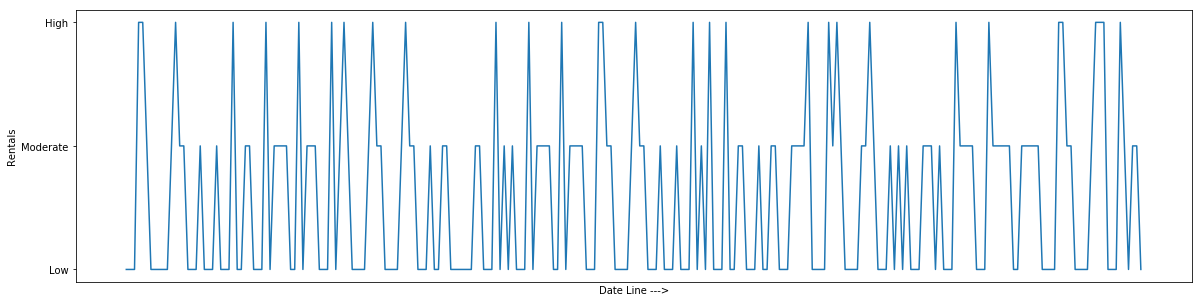

In [35]:
plt.figure(figsize=(20,5))
plt.plot(target)
plt.xticks(())
plt.yticks((range(3)), class_names)
plt.xlabel("Date Line --->")
plt.ylabel("Rentals")
plt.show()

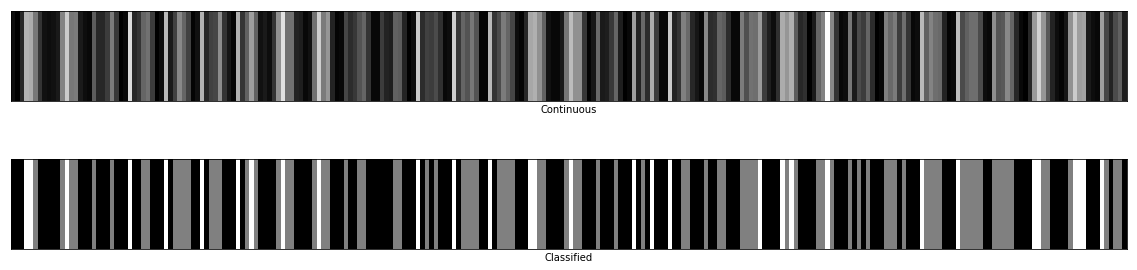

In [70]:
markers = [[dataset['Rentals'].values],[target]]
xlabels = ["Continuous","Classified"]
plt.figure(figsize=(20,5))
for marker,i in zip(markers, range(1,3)):
    plt.subplot(2,1,i)
    plt.imshow(marker, aspect=20, cmap = "gray")
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(xlabels[i-1])
plt.show()

In [72]:
target

array([0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 0, 1, 1, 0])

In [74]:
dataset["HH"] = dataset["HH"].astype(str)
dataset["Day"] = dataset["Day"].astype(str)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
DD         248 non-null int64
HH         248 non-null object
Day        248 non-null object
Rentals    248 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [77]:
data = dataset.drop(columns=["DD", "Rentals"])

In [79]:
data = pd.get_dummies(data)

In [81]:
X = data.values
Y = target

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186, 15), (62, 15), (186,), (62,))

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rfc = RandomForestClassifier(n_estimators=300)

In [275]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
print("Test Score: ",rfc.score(X_test, y_test),"\nTrain Score:",rfc.score(X_train, y_train))

Test Score:  0.8064516129032258 
Train Score: 0.8655913978494624


In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=2)

In [108]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [109]:
print("Test Score: ",knn.score(X_test, y_test),"\nTrain Score:",knn.score(X_train, y_train))

Test Score:  0.8064516129032258 
Train Score: 0.8387096774193549


In [264]:
from sklearn.linear_model import LogisticRegression

In [265]:
lr = LogisticRegression()

In [266]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
print("Test Score: ",lr.score(X_test, y_test),"\nTrain Score:",lr.score(X_train, y_train))

Test Score:  0.7096774193548387 
Train Score: 0.7365591397849462
